# **Title of Project**


### Handwritten Digit Prediction


## **Import Library**


In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt

## **Import Data**


In [2]:
from sklearn.datasets import load_digits
df = load_digits()

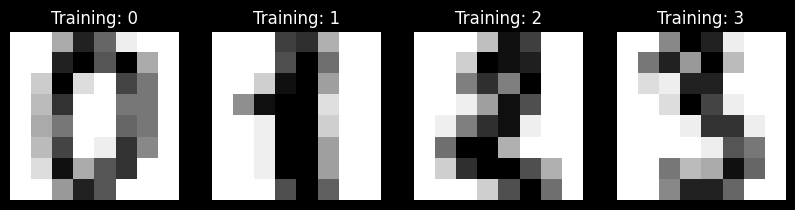

In [3]:
_,axes = plt.subplots(nrows=1,ncols=4,figsize=(10,3))
for ax,image,label in zip(axes,df.images,df.target):
    ax.set_axis_off()
    ax.imshow(image,cmap=plt.cm.gray_r,interpolation='nearest')
    ax.set_title('Training: %i' % label)

## **Describe Data**


In [4]:
df.images.shape

(1797, 8, 8)

In [5]:
df.images[0]

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

In [6]:
df.images[0].shape

(8, 8)

In [7]:
len(df.images)

1797

In [8]:
n_samples = len(df.images)
data = df.images.reshape((n_samples,-1))

In [9]:
data[0]

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

In [10]:
data[0]

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

In [11]:
data[0].shape

(64,)

## **Data Scaling**


In [12]:
data.min()

0.0

In [13]:
data.max()

16.0

In [14]:
data = data/16

## **Train Test Split**


In [15]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(data,df.target,test_size=0.3,shuffle=False)

In [16]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1257, 64), (540, 64), (1257,), (540,))

## **Modeling**


In [17]:
# random Forest model
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X_train,y_train)

RandomForestClassifier()

## **Prediction**


In [18]:
y_pred = rf.predict(X_test)

In [19]:
y_pred

array([4, 0, 5, 3, 6, 9, 6, 5, 7, 5, 4, 4, 7, 2, 8, 2, 2, 5, 7, 9, 5, 4,
       8, 8, 4, 9, 0, 8, 9, 8, 0, 3, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1, 1, 3,
       4, 5, 6, 7, 8, 9, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 9, 5, 5, 6, 5,
       0, 9, 8, 9, 8, 4, 1, 7, 7, 3, 5, 1, 0, 0, 2, 3, 7, 8, 3, 0, 1, 3,
       6, 3, 3, 7, 3, 3, 4, 6, 6, 6, 4, 9, 1, 5, 0, 9, 6, 2, 8, 3, 0, 0,
       1, 7, 6, 3, 2, 1, 7, 4, 6, 3, 1, 3, 9, 1, 7, 6, 8, 4, 3, 1, 4, 0,
       5, 3, 6, 9, 6, 1, 7, 5, 4, 4, 7, 3, 8, 2, 2, 5, 7, 9, 5, 4, 8, 8,
       4, 9, 0, 8, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1, 2, 3, 4, 5, 6, 7,
       8, 9, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 9, 5, 5, 6, 5, 0, 9, 8, 9,
       8, 4, 1, 7, 7, 3, 5, 1, 0, 0, 2, 2, 7, 9, 2, 0, 9, 2, 6, 3, 3, 7,
       3, 3, 4, 6, 6, 6, 4, 9, 1, 5, 0, 9, 5, 2, 8, 2, 0, 0, 9, 7, 6, 3,
       2, 3, 7, 4, 6, 3, 1, 3, 9, 9, 7, 6, 8, 4, 3, 1, 4, 0, 5, 3, 6, 9,
       6, 9, 7, 5, 4, 4, 7, 2, 8, 2, 2, 5, 7, 9, 5, 4, 8, 8, 4, 3, 0, 8,
       9, 8, 0, 1, 2, 3, 4, 5, 6, 8, 1, 9, 0, 1, 2,

## **Model Evaluation**


In [20]:
from sklearn.metrics import confusion_matrix, classification_report
confusion_matrix(y_test,y_pred)

array([[52,  0,  0,  0,  1,  0,  0,  0,  0,  0],
       [ 0, 46,  0,  2,  0,  1,  0,  0,  0,  4],
       [ 1,  1, 46,  5,  0,  0,  0,  0,  0,  0],
       [ 0,  1,  1, 41,  0,  3,  0,  1,  6,  0],
       [ 0,  0,  0,  0, 54,  0,  0,  2,  0,  1],
       [ 0,  0,  0,  0,  0, 55,  1,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0, 54,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 53,  1,  0],
       [ 0,  3,  0,  0,  1,  0,  0,  0, 47,  1],
       [ 0,  0,  0,  1,  0,  2,  0,  0,  1, 51]])

In [21]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98        53
           1       0.90      0.87      0.88        53
           2       0.98      0.87      0.92        53
           3       0.84      0.77      0.80        53
           4       0.96      0.95      0.96        57
           5       0.90      0.98      0.94        56
           6       0.98      1.00      0.99        54
           7       0.95      0.98      0.96        54
           8       0.85      0.90      0.88        52
           9       0.89      0.93      0.91        55

    accuracy                           0.92       540
   macro avg       0.92      0.92      0.92       540
weighted avg       0.92      0.92      0.92       540

